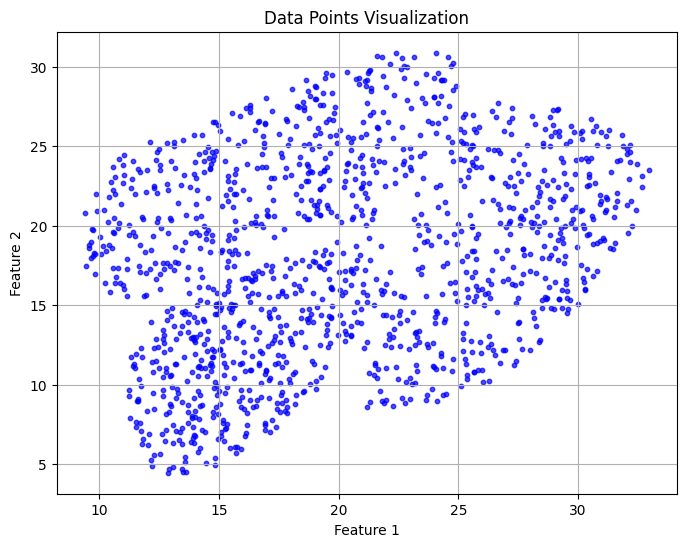

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('data.csv')


plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], s=10, alpha=0.7, color='blue')  
plt.title('Data Points Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


# Here i have draw the scatter plot of dataset to see how my data points are distributed so i get this where i i am seeing three cluster approximately.

# here i have done by both scaling and pca

Silhouette Scores:
KMeans: 0.41
DBSCAN: 0.04
Agg Single: -0.32
Agg Complete: 0.33
Agg Average: 0.40
Agg Ward: 0.38
KMedoids: 0.42


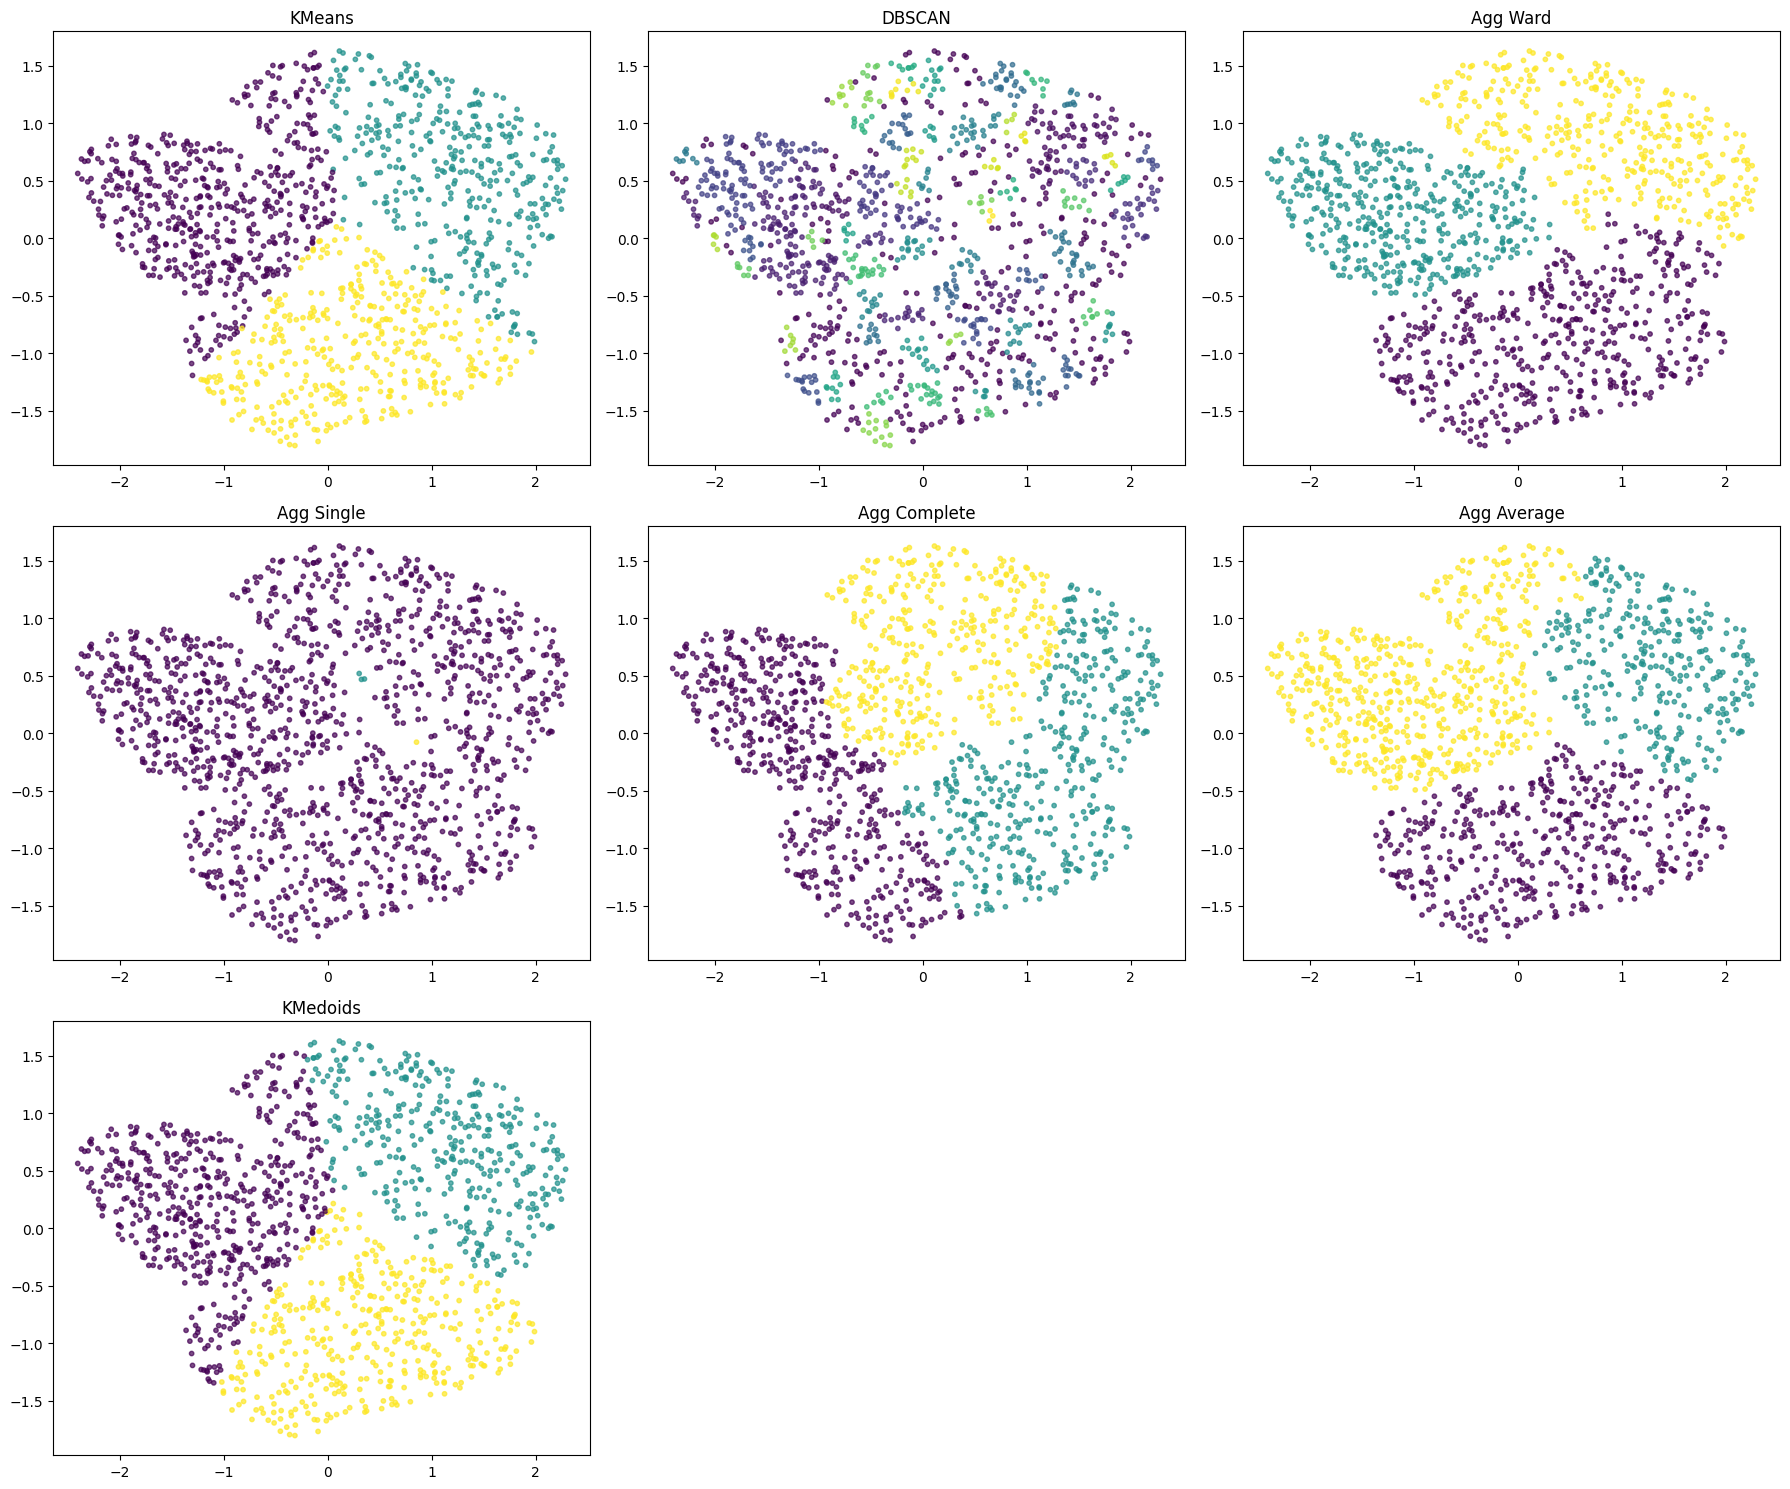

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric

# Load data
data = pd.read_csv('data.csv')

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reduce dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Number of clusters
n_clust = 3

# KMeans
kmeans = KMeans(n_clusters=n_clust, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)
kmeans_score = silhouette_score(data_pca, kmeans_labels)

# DBSCAN
best_eps = 0
best_dbscan_score = -1
dbscan_labels_best = None

for eps in np.arange(0.1, 5.0, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(data_pca)
    if len(set(labels)) > 1:
        score = silhouette_score(data_pca, labels)
        if score > best_dbscan_score:
            best_dbscan_score = score
            best_eps = eps
            dbscan_labels_best = labels

# Agglomerative Clustering
agg_single = AgglomerativeClustering(n_clusters=n_clust, linkage='single')
labels_single = agg_single.fit_predict(data_pca)
score_single = silhouette_score(data_pca, labels_single)

agg_complete = AgglomerativeClustering(n_clusters=n_clust, linkage='complete')
labels_complete = agg_complete.fit_predict(data_pca)
score_complete = silhouette_score(data_pca, labels_complete)

agg_avg = AgglomerativeClustering(n_clusters=n_clust, linkage='average')
labels_avg = agg_avg.fit_predict(data_pca)
score_avg = silhouette_score(data_pca, labels_avg)

agg_ward = AgglomerativeClustering(n_clusters=n_clust, linkage='ward')
labels_ward = agg_ward.fit_predict(data_pca)
score_ward = silhouette_score(data_pca, labels_ward)

# K-Medoids
init_medoids = list(range(n_clust))
metric = distance_metric(type_metric.EUCLIDEAN)
kmedoids = kmedoids(data_pca, init_medoids, metric=metric)
kmedoids.process()
clusters = kmedoids.get_clusters()
kmedoids_labels = np.zeros(len(data_pca), dtype=int)
for i, cluster in enumerate(clusters):
    for idx in cluster:
        kmedoids_labels[idx] = i
kmedoids_score = silhouette_score(data_pca, kmedoids_labels)

# Print silhouette scores
print("Silhouette Scores:")
print(f"KMeans: {kmeans_score:.2f}")
print(f"DBSCAN: {best_dbscan_score:.2f}")
print(f"Agg Single: {score_single:.2f}")
print(f"Agg Complete: {score_complete:.2f}")
print(f"Agg Average: {score_avg:.2f}")
print(f"Agg Ward: {score_ward:.2f}")
print(f"KMedoids: {kmedoids_score:.2f}")

# Plot results
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
methods = [
    ("KMeans", kmeans_labels),
    ("DBSCAN", dbscan_labels_best),
    ("Agg Ward", labels_ward),
    ("Agg Single", labels_single),
    ("Agg Complete", labels_complete),
    ("Agg Average", labels_avg),
    ("KMedoids", kmedoids_labels),
]

for ax, (name, labels) in zip(axs.flat, methods):
    ax.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_title(name)

for ax in axs.flat[len(methods):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# only use standardscaling but without pca

Silhouette Scores:
KMeans: 0.41
DBSCAN: 0.06
Agg Single: -0.32
Agg Complete: 0.26
Agg Average: 0.39
Agg Ward: 0.34
KMedoids: 0.42


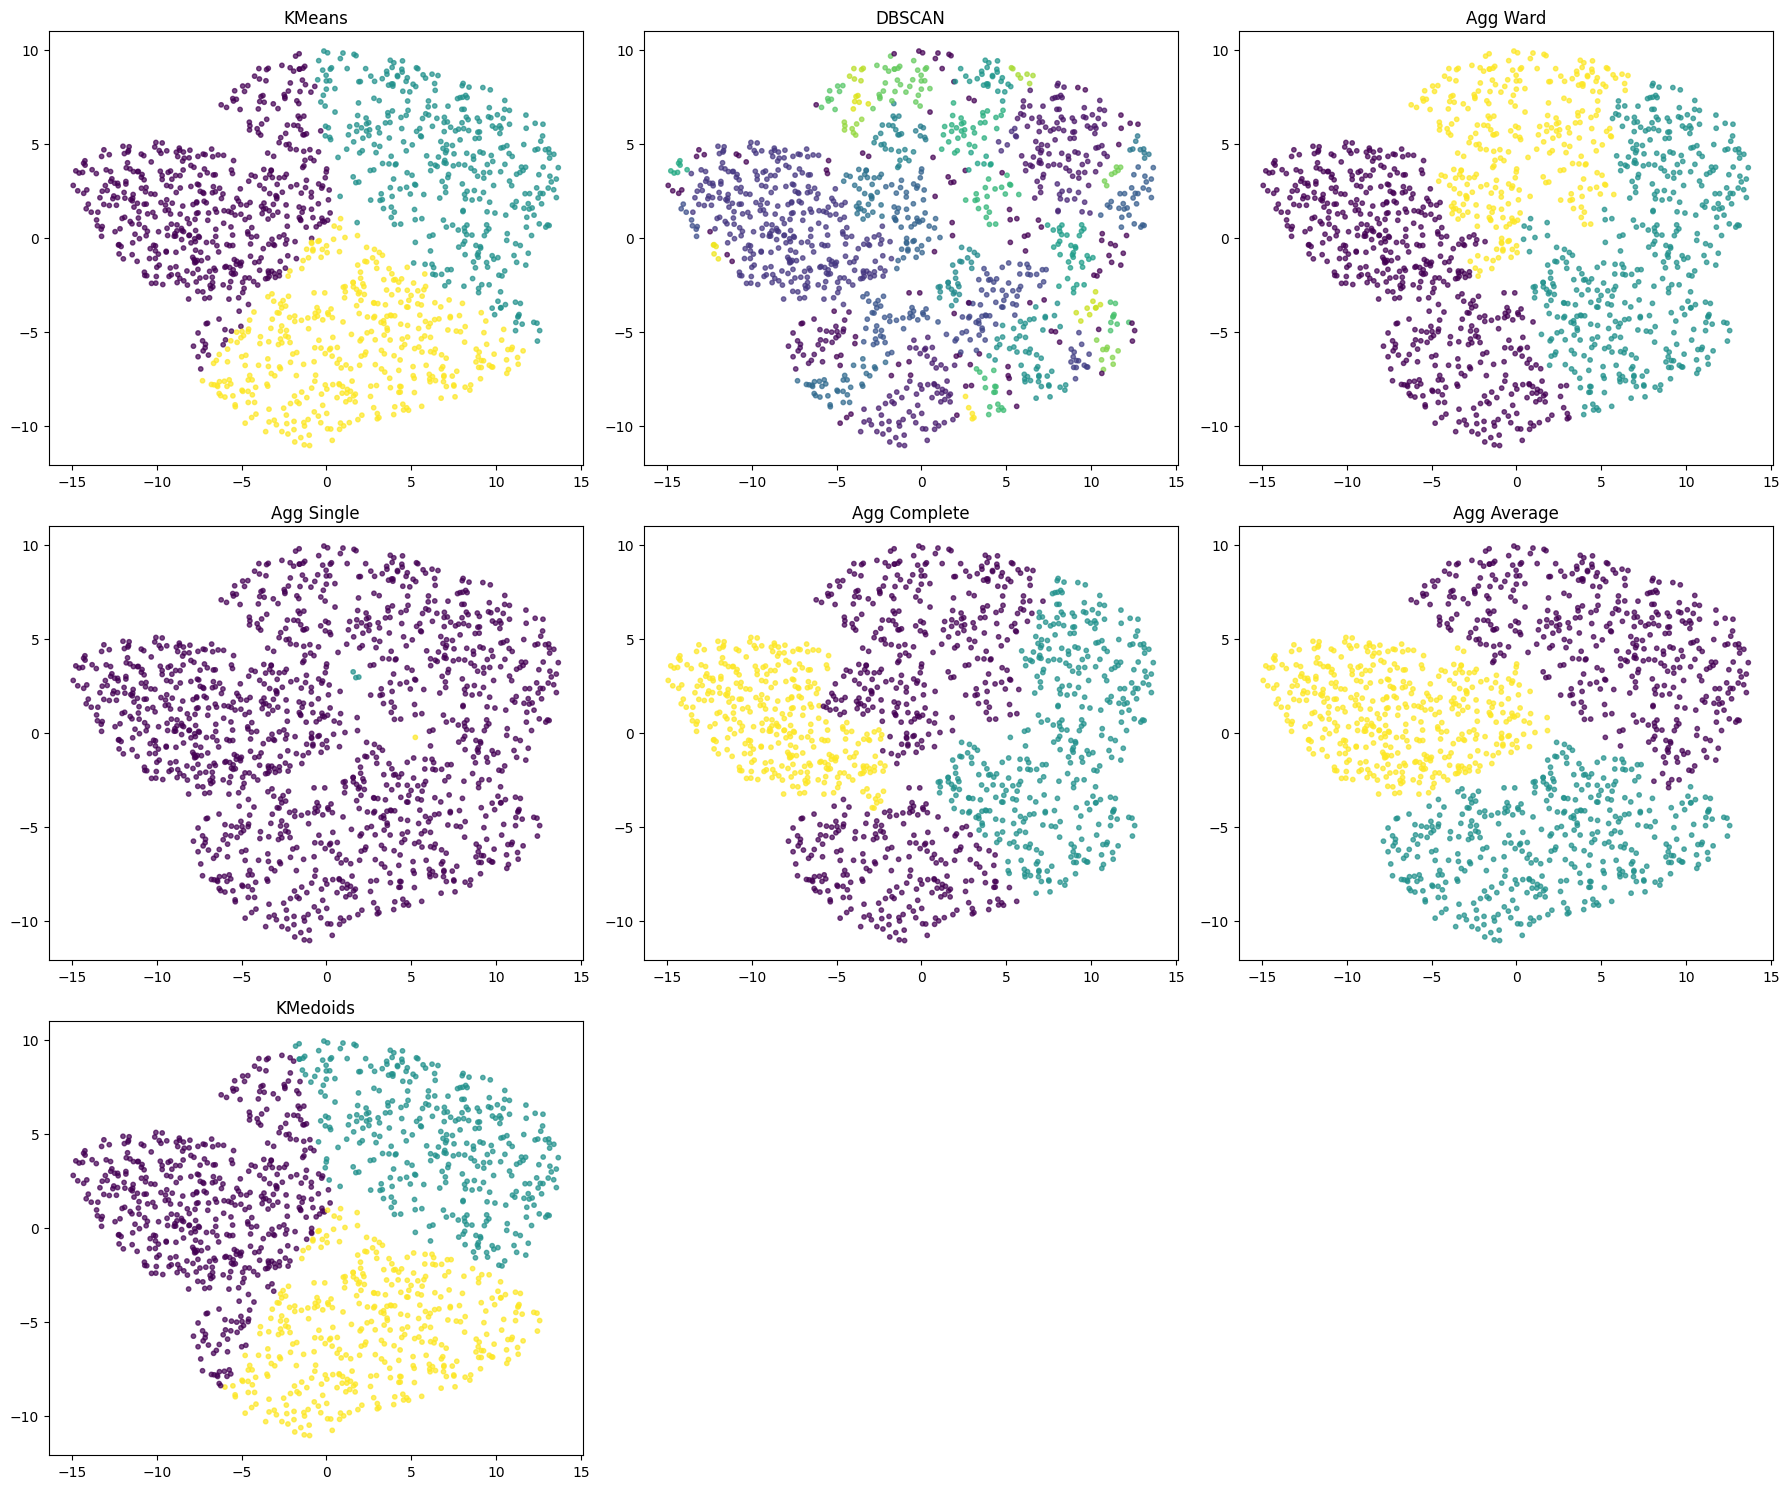

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric

# Load data
data = pd.read_csv('data.csv')

# Reduce dimensions without scaling
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Number of clusters
n_clust = 3

# KMeans
kmeans = KMeans(n_clusters=n_clust, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)
kmeans_score = silhouette_score(data_pca, kmeans_labels)

# DBSCAN
best_eps = 0
best_dbscan_score = -1
dbscan_labels_best = None

for eps in np.arange(0.1, 5.0, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(data_pca)
    if len(set(labels)) > 1:
        score = silhouette_score(data_pca, labels)
        if score > best_dbscan_score:
            best_dbscan_score = score
            best_eps = eps
            dbscan_labels_best = labels

# Agglomerative Clustering
agg_single = AgglomerativeClustering(n_clusters=n_clust, linkage='single')
labels_single = agg_single.fit_predict(data_pca)
score_single = silhouette_score(data_pca, labels_single)

agg_complete = AgglomerativeClustering(n_clusters=n_clust, linkage='complete')
labels_complete = agg_complete.fit_predict(data_pca)
score_complete = silhouette_score(data_pca, labels_complete)

agg_avg = AgglomerativeClustering(n_clusters=n_clust, linkage='average')
labels_avg = agg_avg.fit_predict(data_pca)
score_avg = silhouette_score(data_pca, labels_avg)

agg_ward = AgglomerativeClustering(n_clusters=n_clust, linkage='ward')
labels_ward = agg_ward.fit_predict(data_pca)
score_ward = silhouette_score(data_pca, labels_ward)

# K-Medoids
init_medoids = list(range(n_clust))
metric = distance_metric(type_metric.EUCLIDEAN)
kmedoids = kmedoids(data_pca, init_medoids, metric=metric)
kmedoids.process()
clusters = kmedoids.get_clusters()
kmedoids_labels = np.zeros(len(data_pca), dtype=int)
for i, cluster in enumerate(clusters):
    for idx in cluster:
        kmedoids_labels[idx] = i
kmedoids_score = silhouette_score(data_pca, kmedoids_labels)

# Print silhouette scores
print("Silhouette Scores:")
print(f"KMeans: {kmeans_score:.2f}")
print(f"DBSCAN: {best_dbscan_score:.2f}")
print(f"Agg Single: {score_single:.2f}")
print(f"Agg Complete: {score_complete:.2f}")
print(f"Agg Average: {score_avg:.2f}")
print(f"Agg Ward: {score_ward:.2f}")
print(f"KMedoids: {kmedoids_score:.2f}")

# Plot results
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
methods = [
    ("KMeans", kmeans_labels),
    ("DBSCAN", dbscan_labels_best),
    ("Agg Ward", labels_ward),
    ("Agg Single", labels_single),
    ("Agg Complete", labels_complete),
    ("Agg Average", labels_avg),
    ("KMedoids", kmedoids_labels),
]

for ax, (name, labels) in zip(axs.flat, methods):
    ax.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_title(name)

for ax in axs.flat[len(methods):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Now this is without standardscaler and pca both.

Silhouette Scores:
KMeans: 0.41
DBSCAN: 0.06
Agg Single: -0.32
Agg Complete: 0.26
Agg Average: 0.39
Agg Ward: 0.34
KMedoids: 0.42


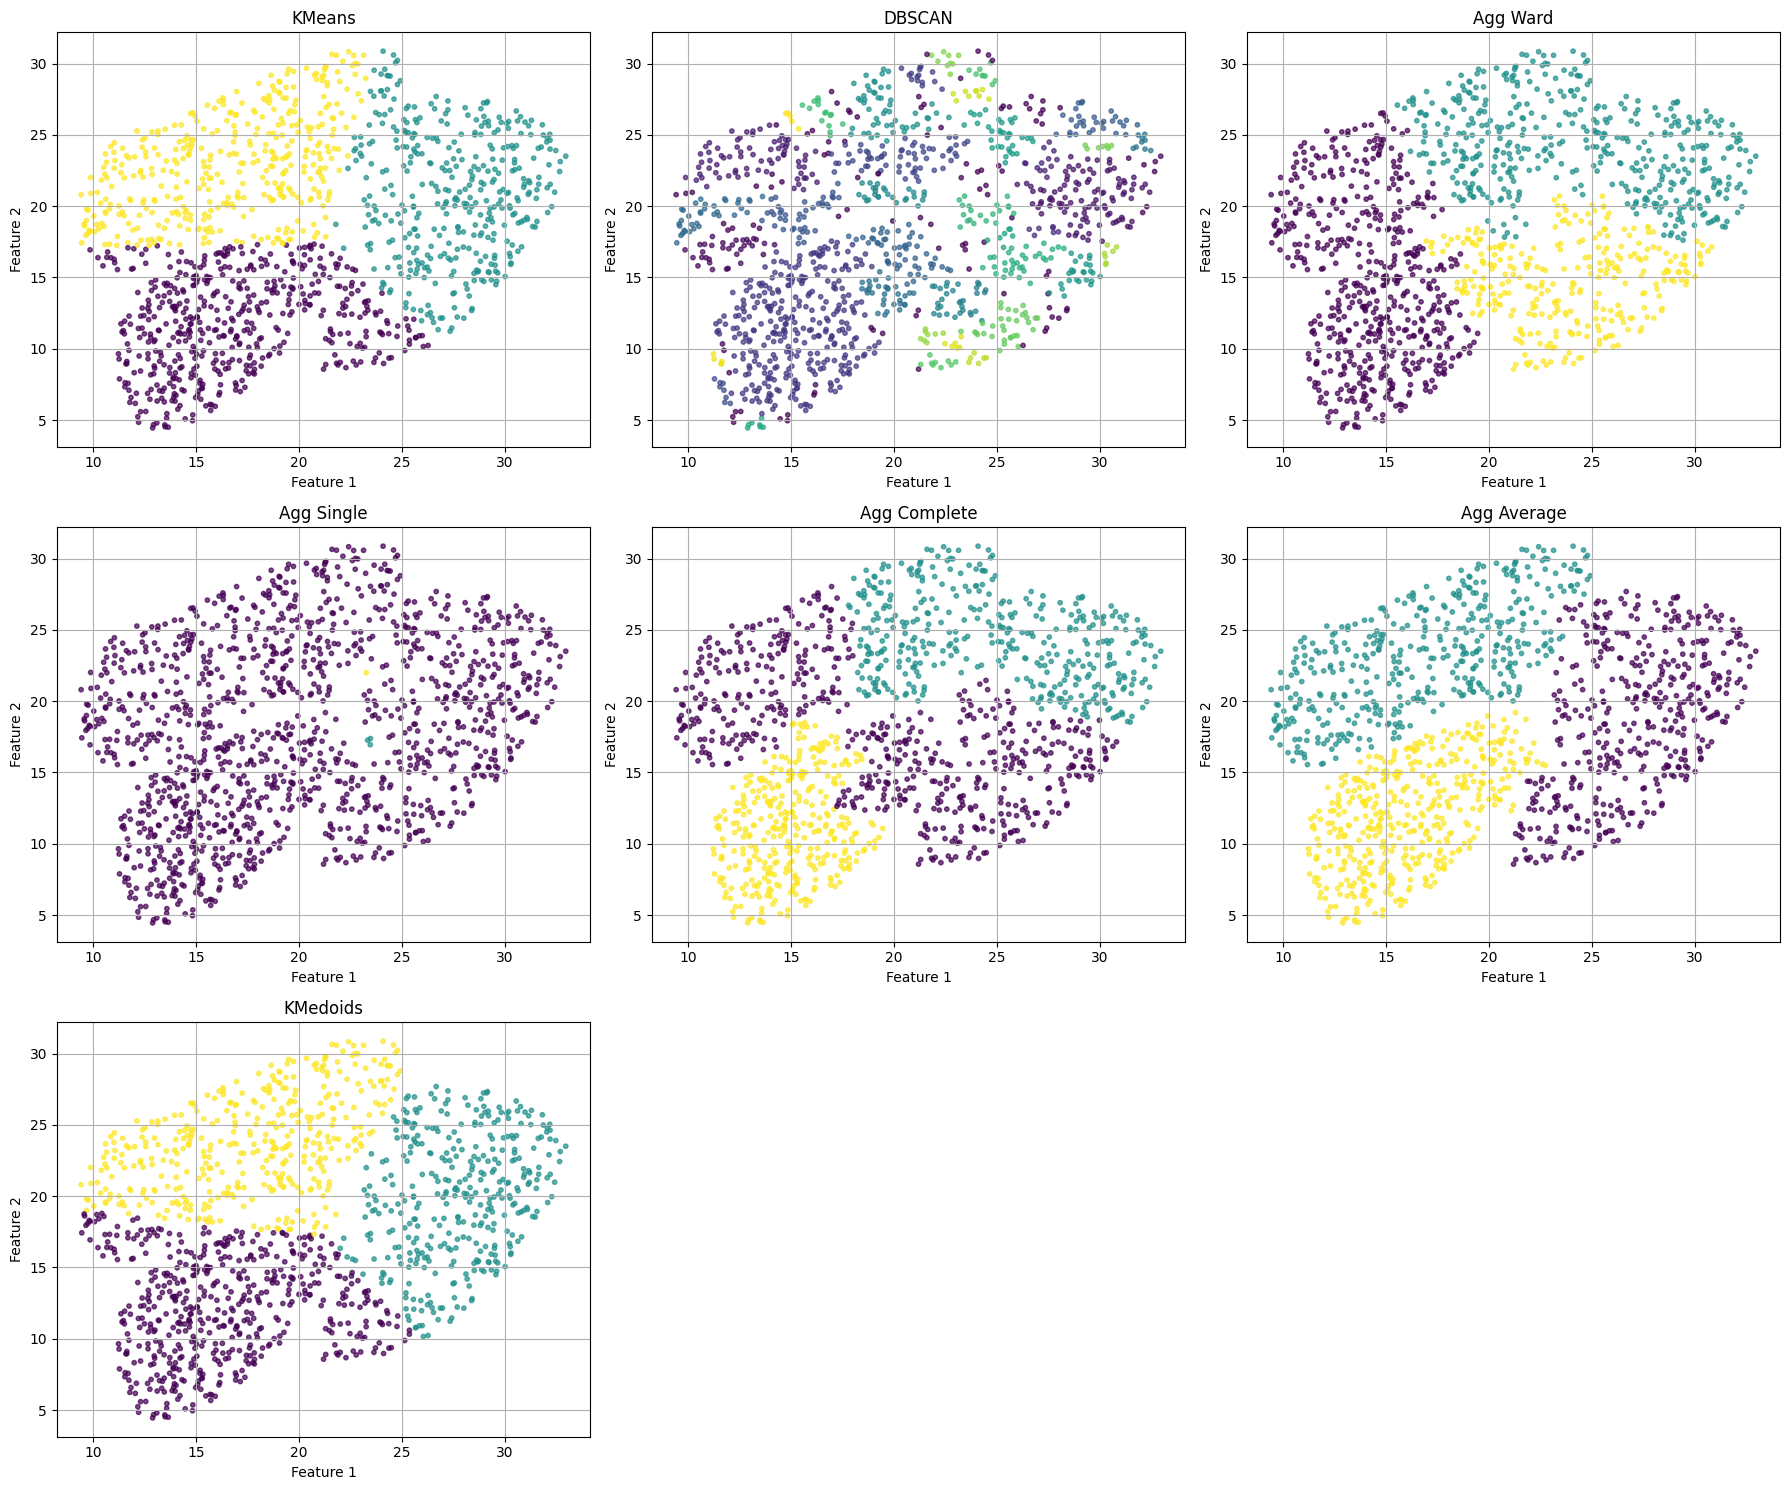

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric

# Load data
data = pd.read_csv('data.csv')

# Number of clusters
n_clust = 3

# KMeans
kmeans = KMeans(n_clusters=n_clust, random_state=42)
kmeans_labels = kmeans.fit_predict(data)
kmeans_score = silhouette_score(data, kmeans_labels)

# DBSCAN
best_eps = 0
best_dbscan_score = -1
dbscan_labels_best = None

for eps in np.arange(0.1, 5.0, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(data)
    if len(set(labels)) > 1:
        score = silhouette_score(data, labels)
        if score > best_dbscan_score:
            best_dbscan_score = score
            best_eps = eps
            dbscan_labels_best = labels

# Agglomerative Clustering
agg_single = AgglomerativeClustering(n_clusters=n_clust, linkage='single')
labels_single = agg_single.fit_predict(data)
score_single = silhouette_score(data, labels_single)

agg_complete = AgglomerativeClustering(n_clusters=n_clust, linkage='complete')
labels_complete = agg_complete.fit_predict(data)
score_complete = silhouette_score(data, labels_complete)

agg_avg = AgglomerativeClustering(n_clusters=n_clust, linkage='average')
labels_avg = agg_avg.fit_predict(data)
score_avg = silhouette_score(data, labels_avg)

agg_ward = AgglomerativeClustering(n_clusters=n_clust, linkage='ward')
labels_ward = agg_ward.fit_predict(data)
score_ward = silhouette_score(data, labels_ward)

# K-Medoids
init_medoids = list(range(n_clust))
metric = distance_metric(type_metric.EUCLIDEAN)
kmedoids = kmedoids(data.values, init_medoids, metric=metric)
kmedoids.process()
clusters = kmedoids.get_clusters()
kmedoids_labels = np.zeros(len(data), dtype=int)
for i, cluster in enumerate(clusters):
    for idx in cluster:
        kmedoids_labels[idx] = i
kmedoids_score = silhouette_score(data, kmedoids_labels)

# Print silhouette scores
print("Silhouette Scores:")
print(f"KMeans: {kmeans_score:.2f}")
print(f"DBSCAN: {best_dbscan_score:.2f}")
print(f"Agg Single: {score_single:.2f}")
print(f"Agg Complete: {score_complete:.2f}")
print(f"Agg Average: {score_avg:.2f}")
print(f"Agg Ward: {score_ward:.2f}")
print(f"KMedoids: {kmedoids_score:.2f}")

# Plot results using first two features
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
methods = [
    ("KMeans", kmeans_labels),
    ("DBSCAN", dbscan_labels_best),
    ("Agg Ward", labels_ward),
    ("Agg Single", labels_single),
    ("Agg Complete", labels_complete),
    ("Agg Average", labels_avg),
    ("KMedoids", kmedoids_labels),
]

for ax, (name, labels) in zip(axs.flat, methods):
    scatter = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_title(name)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True)

# Remove empty subplots
for ax in axs.flat[len(methods):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# only use pca not scaling 

Labels saved to labels_avg.txt
Silhouette Scores:
KMeans: 0.41
DBSCAN: 0.06
Agg Single: -0.32
Agg Complete: 0.26
Agg Average: 0.39
Agg Ward: 0.34
KMedoids: 0.42


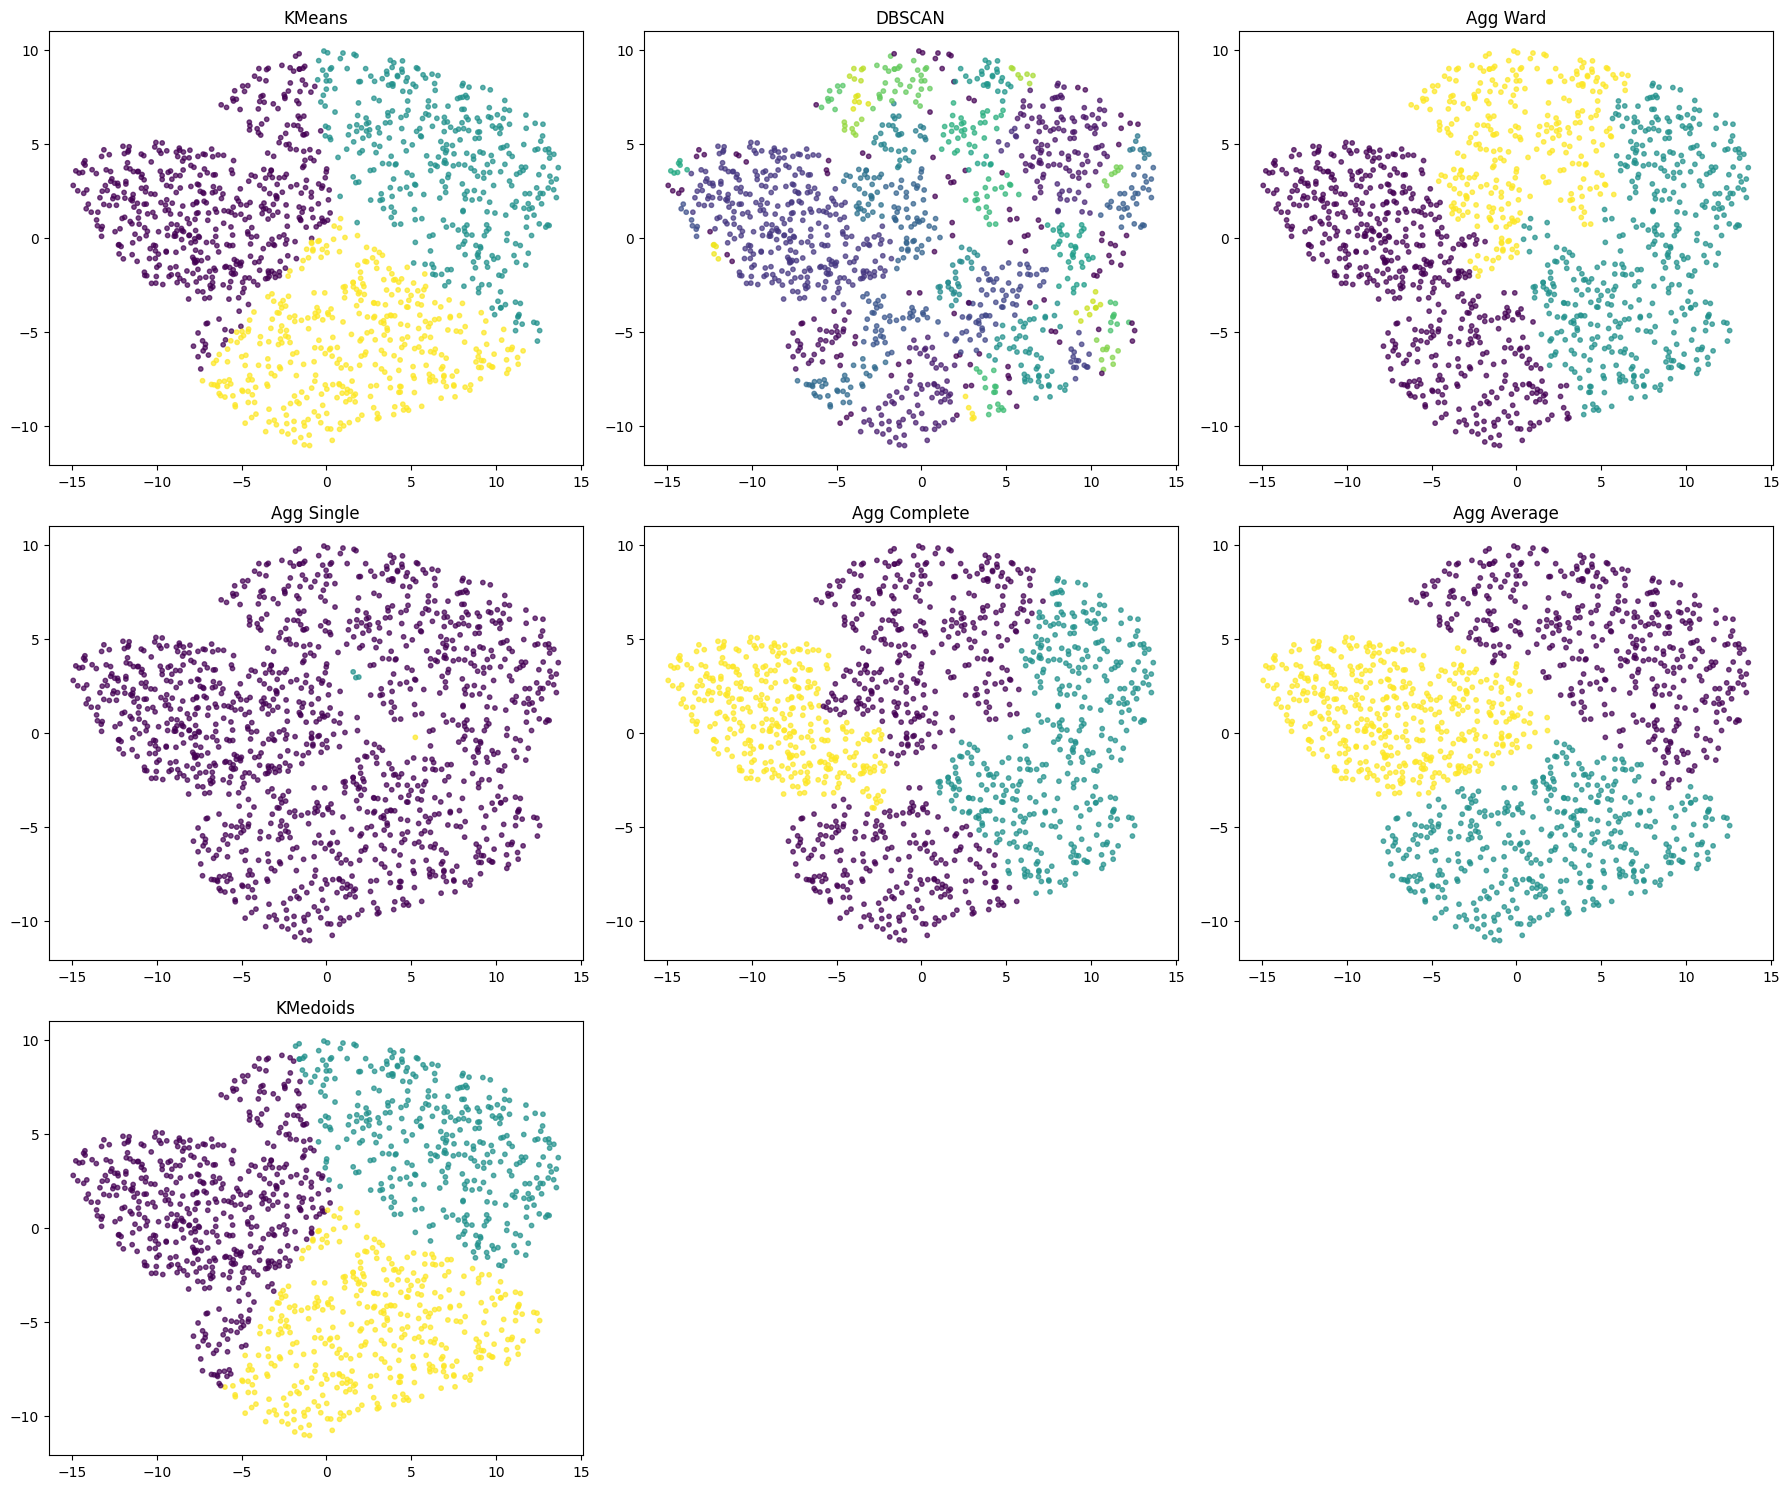

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric

# Load data
data = pd.read_csv('data.csv')

# Reduce dimensions without scaling
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Number of clusters
n_clust = 3

# KMeans
kmeans = KMeans(n_clusters=n_clust, random_state=42)
kmeans_labels = kmeans.fit_predict(data_pca)
kmeans_score = silhouette_score(data_pca, kmeans_labels)

# DBSCAN
best_eps = 0
best_dbscan_score = -1
dbscan_labels_best = None

for eps in np.arange(0.1, 5.0, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(data_pca)
    if len(set(labels)) > 1:
        score = silhouette_score(data_pca, labels)
        if score > best_dbscan_score:
            best_dbscan_score = score
            best_eps = eps
            dbscan_labels_best = labels

# Agglomerative Clustering
agg_single = AgglomerativeClustering(n_clusters=n_clust, linkage='single')
labels_single = agg_single.fit_predict(data_pca)
score_single = silhouette_score(data_pca, labels_single)

agg_complete = AgglomerativeClustering(n_clusters=n_clust, linkage='complete')
labels_complete = agg_complete.fit_predict(data_pca)
score_complete = silhouette_score(data_pca, labels_complete)

agg_avg = AgglomerativeClustering(n_clusters=n_clust, linkage='average')
labels_avg = agg_avg.fit_predict(data_pca)
score_avg = silhouette_score(data_pca, labels_avg)

agg_ward = AgglomerativeClustering(n_clusters=n_clust, linkage='ward')
labels_ward = agg_ward.fit_predict(data_pca)
score_ward = silhouette_score(data_pca, labels_ward)

# K-Medoids
init_medoids = list(range(n_clust))
metric = distance_metric(type_metric.EUCLIDEAN)
kmedoids = kmedoids(data_pca, init_medoids, metric=metric)
kmedoids.process()
clusters = kmedoids.get_clusters()
kmedoids_labels = np.zeros(len(data_pca), dtype=int)
for i, cluster in enumerate(clusters):
    for idx in cluster:
        kmedoids_labels[idx] = i
kmedoids_score = silhouette_score(data_pca, kmedoids_labels)

# Save Agglomerative Average labels
with open("labels_avg.txt", "w") as f:
    for label in labels_avg:
        f.write(f"{label}\n")

print("Labels saved to labels_avg.txt")

# Print silhouette scores
print("Silhouette Scores:")
print(f"KMeans: {kmeans_score:.2f}")
print(f"DBSCAN: {best_dbscan_score:.2f}")
print(f"Agg Single: {score_single:.2f}")
print(f"Agg Complete: {score_complete:.2f}")
print(f"Agg Average: {score_avg:.2f}")
print(f"Agg Ward: {score_ward:.2f}")
print(f"KMedoids: {kmedoids_score:.2f}")

# Plot results
fig, axs = plt.subplots(3, 3, figsize=(18, 15))
methods = [
    ("KMeans", kmeans_labels),
    ("DBSCAN", dbscan_labels_best),
    ("Agg Ward", labels_ward),
    ("Agg Single", labels_single),
    ("Agg Complete", labels_complete),
    ("Agg Average", labels_avg),
    ("KMedoids", kmedoids_labels),
]

for ax, (name, labels) in zip(axs.flat, methods):
    ax.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
    ax.set_title(name)

for ax in axs.flat[len(methods):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Lastly I have find only PCA using without scaling and average agglomerative as best teachnique .